In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
from toolbox_02450 import gausKernelDensity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
#data = np.loadtxt('dataset.csv', skiprows=1, delimiter=',')
df_unnorm = pd.read_csv('dataset.csv')
df = (df_unnorm - df_unnorm.mean()) / df_unnorm.std()
data = df.as_matrix()

In [3]:
# Estimate the optimal kernel density width, by leave-one-out cross-validation
widths = np.linspace(0.2, 0.7, 100)
logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
    f, log_f = gausKernelDensity(data, w)
    logP[i] = log_f.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

Optimal estimated width is: 0.4525252525252525


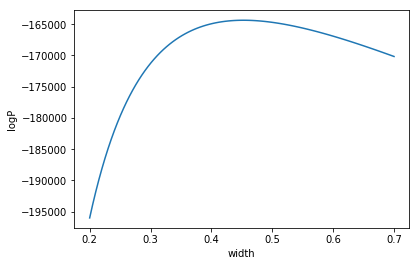

In [62]:
plt.plot(widths, logP)
plt.xlabel('width')
plt.ylabel('logP')
plt.savefig('kernel_width.pdf')

In [5]:
# Estimate density for each observation not including the observation
# itself in the density estimate
density, log_density = gausKernelDensity(data, width)

# Sort the densities
#i = (density.argsort(axis=0)).ravel()
#density_kernel = density[i]

density_kernel = density.flatten()

# Display the index of the lowest density data object

print('Lowest density: {0} for data object: {1}'.format(np.min(density_kernel),np.argmin(density_kernel)))
print('Highest density: {0} for data object: {1}'.format(np.max(density_kernel),np.argmax(density_kernel)))

Lowest density: 2.287401257855903e-105 for data object: 67
Highest density: 1.2335660560505346e-21 for data object: 37


In [6]:
K = 5
knn = neighbors.NearestNeighbors(n_neighbors = K)
knn.fit(df)
dist, ind = knn.kneighbors()
density_knn = 1 / (np.sum(dist, axis=1) / K)
ard = density / (np.sum(density[ind], axis=1) / K)
ard = ard.flatten()
print (np.min(density), np.max(density))
print (np.argmin(density), np.argmax(density))
print (np.min(ard), np.max(ard))
print (np.argmin(ard), np.argmax(ard))

2.28740125786e-105 1.23356605605e-21
67 37
8.45731367597e-79 4.99999433264
67 210


In [7]:
Ks = np.zeros(len(df))
maxK = 10
for i in range(len(df)):
    break
    knn = neighbors.NearestNeighbors()
    knn.fit(df.drop(i))
    densities = np.zeros(len(df))
    for K in range(1, maxK + 1):        
        dist, ind = knn.kneighbors(n_neighbors = K)
        density = 1 / (np.sum(dist, axis=1) / K)
        densities[K] = np.sum(density)
#        print ('   ', i, K, densities[K])
    Ks[i] = np.argmax(densities)
    print (i, Ks[i])

In [8]:
pca = PCA()
pca.fit(df)
pcas = np.inner(df, pca.components_)

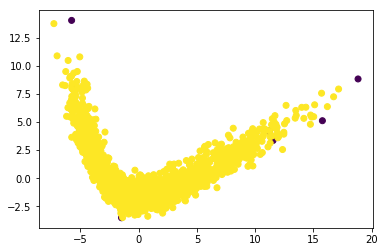

In [9]:
kernel_treshold = 1e-50
plt.scatter(pcas[:,0], pcas[:,1], c = np.where(density_kernel < kernel_treshold, 0, 1))

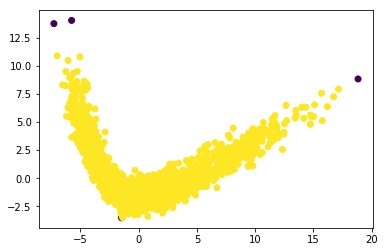

In [10]:
knn_treshold = 0.11
plt.scatter(pcas[:,0], pcas[:,1], c = np.where(density_knn < knn_treshold, 0, 1))

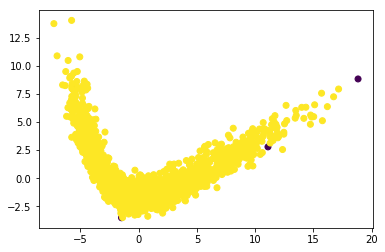

In [11]:
ard_treshold = 1e-23
plt.scatter(pcas[:,0], pcas[:,1], c = np.where(ard < ard_treshold, 0, 1))

In [12]:
outliers_kernel = df_unnorm[density_kernel < kernel_treshold]
outliers_kernel.to_csv('outliers_kernel.csv')
outliers_kernel

,stage,home_team_goal,away_team_goal,possession_home,B365H,B365D,B365A,BWH,BWD,BWA,...,shoton_home,shoton_away,shotoff_home,shotoff_away,foulcommit_home,foulcommit_away,ycard_home,ycard_away,rcard_home,rcard_away
12,28,2,4,51,1.44,4.33,7.50,1.40,4.10,8.00,...,15,4,6,3,17,13,3,1,2,0
38,31,2,0,53,1.25,5.75,13.00,1.22,5.50,12.00,...,4,4,5,5,9,25,1,4,1,0
67,34,0,0,45,2.30,3.25,3.20,2.30,3.20,3.00,...,7,4,3,10,7,4,0,0,0,0
73,34,1,0,58,1.14,8.00,19.00,1.12,8.25,15.00,...,9,4,10,7,13,24,1,4,0,0
108,38,8,0,59,1.10,10.00,23.00,1.10,8.75,17.00,...,3,3,7,1,12,10,2,2,0,1
127,10,1,0,54,1.17,7.00,17.00,1.15,7.00,14.00,...,18,5,7,2,15,19,2,2,0,0
785,35,0,2,54,12.00,6.50,1.22,12.00,6.00,1.22,...,3,7,3,8,5,10,0,1,0,0
808,38,3,2,80,1.13,9.00,19.00,1.12,8.75,16.00,...,26,1,13,0,4,7,1,1,0,1
874,9,1,0,49,9.50,5.00,1.33,9.00,4.50,1.35,...,4,5,5,10,17,18,2,7,0,2


In [13]:
outliers_knn = df_unnorm[density_knn < knn_treshold]
outliers_knn.to_csv('outliers_knn.csv')
outliers_knn

,stage,home_team_goal,away_team_goal,possession_home,B365H,B365D,B365A,BWH,BWD,BWA,...,shoton_home,shoton_away,shotoff_home,shotoff_away,foulcommit_home,foulcommit_away,ycard_home,ycard_away,rcard_home,rcard_away
12,28,2,4,51,1.44,4.33,7.50,1.40,4.10,8.00,...,15,4,6,3,17,13,3,1,2,0
38,31,2,0,53,1.25,5.75,13.00,1.22,5.50,12.00,...,4,4,5,5,9,25,1,4,1,0
67,34,0,0,45,2.30,3.25,3.20,2.30,3.20,3.00,...,7,4,3,10,7,4,0,0,0,0
108,38,8,0,59,1.10,10.00,23.00,1.10,8.75,17.00,...,3,3,7,1,12,10,2,2,0,1
235,2,0,6,43,15.00,6.00,1.22,12.50,5.50,1.22,...,10,3,4,2,12,9,1,2,0,0
785,35,0,2,54,12.00,6.50,1.22,12.00,6.00,1.22,...,3,7,3,8,5,10,0,1,0,0
874,9,1,0,49,9.50,5.00,1.33,9.00,4.50,1.35,...,4,5,5,10,17,18,2,7,0,2


In [14]:
outliers_ard = df_unnorm[ard < ard_treshold]
outliers_ard.to_csv('outliers_ard.csv')
outliers_ard

,stage,home_team_goal,away_team_goal,possession_home,B365H,B365D,B365A,BWH,BWD,BWA,...,shoton_home,shoton_away,shotoff_home,shotoff_away,foulcommit_home,foulcommit_away,ycard_home,ycard_away,rcard_home,rcard_away
12,28,2,4,51,1.44,4.33,7.50,1.4,4.10,8.00,...,15,4,6,3,17,13,3,1,2,0
67,34,0,0,45,2.30,3.25,3.20,2.3,3.20,3.00,...,7,4,3,10,7,4,0,0,0,0
108,38,8,0,59,1.10,10.00,23.00,1.1,8.75,17.00,...,3,3,7,1,12,10,2,2,0,1
874,9,1,0,49,9.50,5.00,1.33,9.0,4.50,1.35,...,4,5,5,10,17,18,2,7,0,2
1429,25,2,2,76,1.20,7.00,19.00,1.2,6.25,14.00,...,16,2,11,2,3,6,0,0,0,0


In [81]:
def visualize_outliers(density, title):
    x = np.arange(60)
    labels = [ l[:15] + "..."+l[-4:] if len(l) > 20 else l for l in df.columns  ]
    plt.figure(figsize=(6, 16))
    plt.yticks(x, labels)
    indices = np.argsort(density)[:3]
    for i in range(len(df)):
        if not i in indices:
            plt.scatter(df.loc[i], x, c='C0', label='_nolegend_', marker='_')
    for i in range(len(indices)):
        plt.scatter(df.loc[indices[i]], x, c='C%d' % (i + 1), label='outlier %d' % (i + 1), marker='x')
    plt.legend()
    plt.title(title)
    plt.savefig('%s.pdf' % title)

In [ ]:
visualize_outliers(density_kernel, 'Gaussian Kernel')

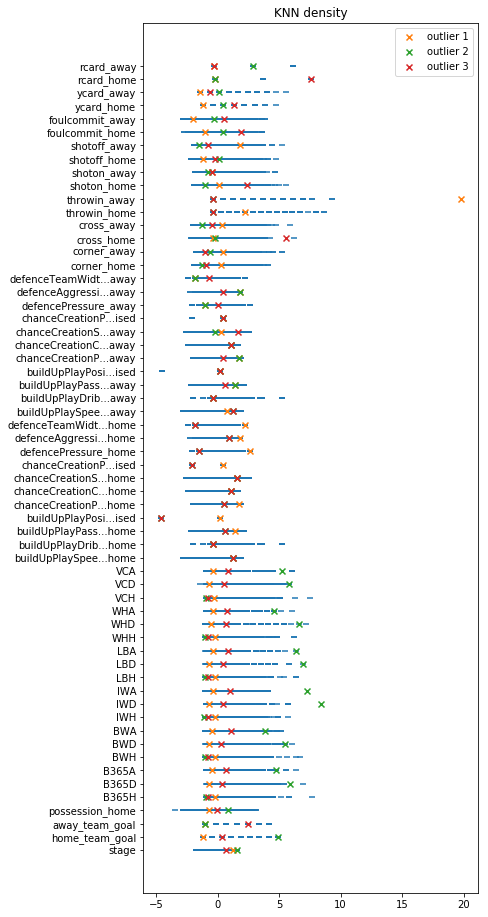

In [77]:
visualize_outliers(density_knn, 'KNN density')

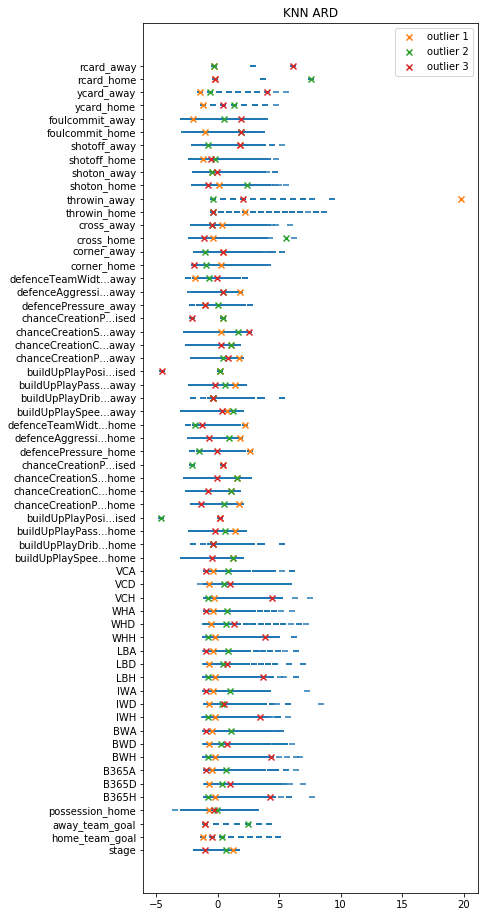

In [78]:
visualize_outliers(ard, 'KNN ARD')